### Data Preprocessing

For numerical features, we can look at the distributions, observe the skew and correct them with de-skewing methods. 

In [1]:
source('../src/load_data.r')
source('../src/multiplot.r')

In [2]:
library(psych)


Attaching package: ‘psych’

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



In [3]:
t(dim(numeric_df))
head(numeric_df)

1451,23


LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,⋯,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
65,8450,2003,2003,196,706,0,150,856,856,⋯,2003,548,0,61,0,0,0,0,0,2008
80,9600,1976,1976,0,978,0,284,1262,1262,⋯,1976,460,298,0,0,0,0,0,0,2007
68,11250,2001,2002,162,486,0,434,920,920,⋯,2001,608,0,42,0,0,0,0,0,2008
60,9550,1915,1970,0,216,0,540,756,961,⋯,1998,642,0,35,272,0,0,0,0,2006
84,14260,2000,2000,350,655,0,490,1145,1145,⋯,2000,836,192,84,0,0,0,0,0,2008
85,14115,1993,1995,0,732,0,64,796,796,⋯,1993,480,40,30,0,320,0,0,700,2009


In [4]:
t(colnames(numeric_df))

LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,⋯,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold


### Managing 0s: Numeric Features Processing

Here we are determining which numeric features contain zeros. For features that are predominately 0, we might consider turning that numeric feature into a categorical feature by either changing them to bools or by binning them.

#### >=2/3 of values are 0s

`mostly_zeros` : If >=2/3 of the values are 0s, we will turn the feature into **booleans**.

#### Between >1/3 and <2/3 of the values are 0s

`some_zeros` : If between >1/3 and <2/3 of the values are 0s, we will **bin** that feature. 

The binning method we will use creates a bin for all 0 values, then determines to range by subtracting the `min` from the `max`. The range is then divided into 4 bins, which the rest of the values will be placed.

#### <=1/3 of the values are 0s

`few_zeros` : If <=1/3 of the values are 0s, we will leave the feature as is.


In [5]:
has_zeros <- function(dataframe){
    column_sums = colSums(dataframe == 0)
    return(t(column_sums))
}

has_zeros(numeric_df)

LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,⋯,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
0,0,0,0,860,464,1284,118,37,0,⋯,0,81,755,653,1244,1427,1335,1444,1399,0


In [6]:
get_mostly_zeros <- function(dataframe){
    mostly_zeros_df <- has_zeros(dataframe) >= (1451/3*2) 
    return(dataframe[,mostly_zeros_df])
}

get_some_zeros <- function(dataframe){
    some_zeros_df <- has_zeros(dataframe) > (1451/3) & has_zeros(dataframe) <(1451/3*2)
    return(dataframe[,some_zeros_df])
}

get_few_zeros <- function(dataframe){
    few_zeros_df <- has_zeros(dataframe) <= (1451/3) 
    return(dataframe[,few_zeros_df])
}

In [7]:
mostly_zeros <- get_mostly_zeros(numeric_df)
some_zeros <- get_some_zeros(numeric_df)
few_zeros <- get_few_zeros(numeric_df)

t(colnames(mostly_zeros))
t(colnames(some_zeros))
t(colnames(few_zeros))

BsmtFinSF2,LowQualFinSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal


MasVnrArea,SecondFlrSF,WoodDeckSF,OpenPorchSF


LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,GrLivArea,GarageYrBlt,GarageArea,YrSold


In [8]:
turn_mostlyzeros_to_bool <- function(df){
    bool_feat <- df != 0
    return(bool_feat)
}

In [9]:
find_binvals <- function(feature){
    temp_feat <- feature[feature !=0]
    maxval <- max(temp_feat)
    minval <- min(temp_feat)
    quart <- (maxval-minval)/4
    binvals <- c(-.0001,minval,minval+quart,minval+2*quart,maxval-quart,maxval)
    return(binvals)
}
    
bin_features <- function(feature){
    binvals <- find_binvals(feature)
    new_feat <- as.factor(.bincode(feature,binvals))
    levels(new_feat) <- c("0", "1st_bin","2nd_bin","3rd_bin","4th_bin")
    return(new_feat)
}

In [10]:
turn_somezeros_to_cat <-  function(df){
    cat_df <- apply(df, 2, bin_features)
    return(cat_df)
}   

In [11]:
numeric_mostlyzero_df <- turn_mostlyzeros_to_bool(mostly_zeros)
numeric_somezeros_df <- turn_somezeros_to_cat(some_zeros)
numeric_fewzeros_df <- few_zeros

In [12]:
head(numeric_mostlyzero_df)
head(numeric_somezeros_df)
head(numeric_fewzeros_df)

,BsmtFinSF2,LowQualFinSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal
1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
5,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
6,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE


MasVnrArea,SecondFlrSF,WoodDeckSF,OpenPorchSF
1st_bin,2nd_bin,0,1st_bin
0,0,2nd_bin,0
1st_bin,2nd_bin,0,1st_bin
0,2nd_bin,0,1st_bin
1st_bin,2nd_bin,1st_bin,1st_bin
0,1st_bin,1st_bin,1st_bin


LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,GrLivArea,GarageYrBlt,GarageArea,YrSold
65,8450,2003,2003,706,150,856,856,1710,2003,548,2008
80,9600,1976,1976,978,284,1262,1262,1262,1976,460,2007
68,11250,2001,2002,486,434,920,920,1786,2001,608,2008
60,9550,1915,1970,216,540,756,961,1717,1998,642,2006
84,14260,2000,2000,655,490,1145,1145,2198,2000,836,2008
85,14115,1993,1995,732,64,796,796,1362,1993,480,2009


#### Deskewing and Scaling

Now that we have our `numeric_fewzeros_df` which consists of the remaining numeric features, we can continue our data preparation by deskewing and scaling.

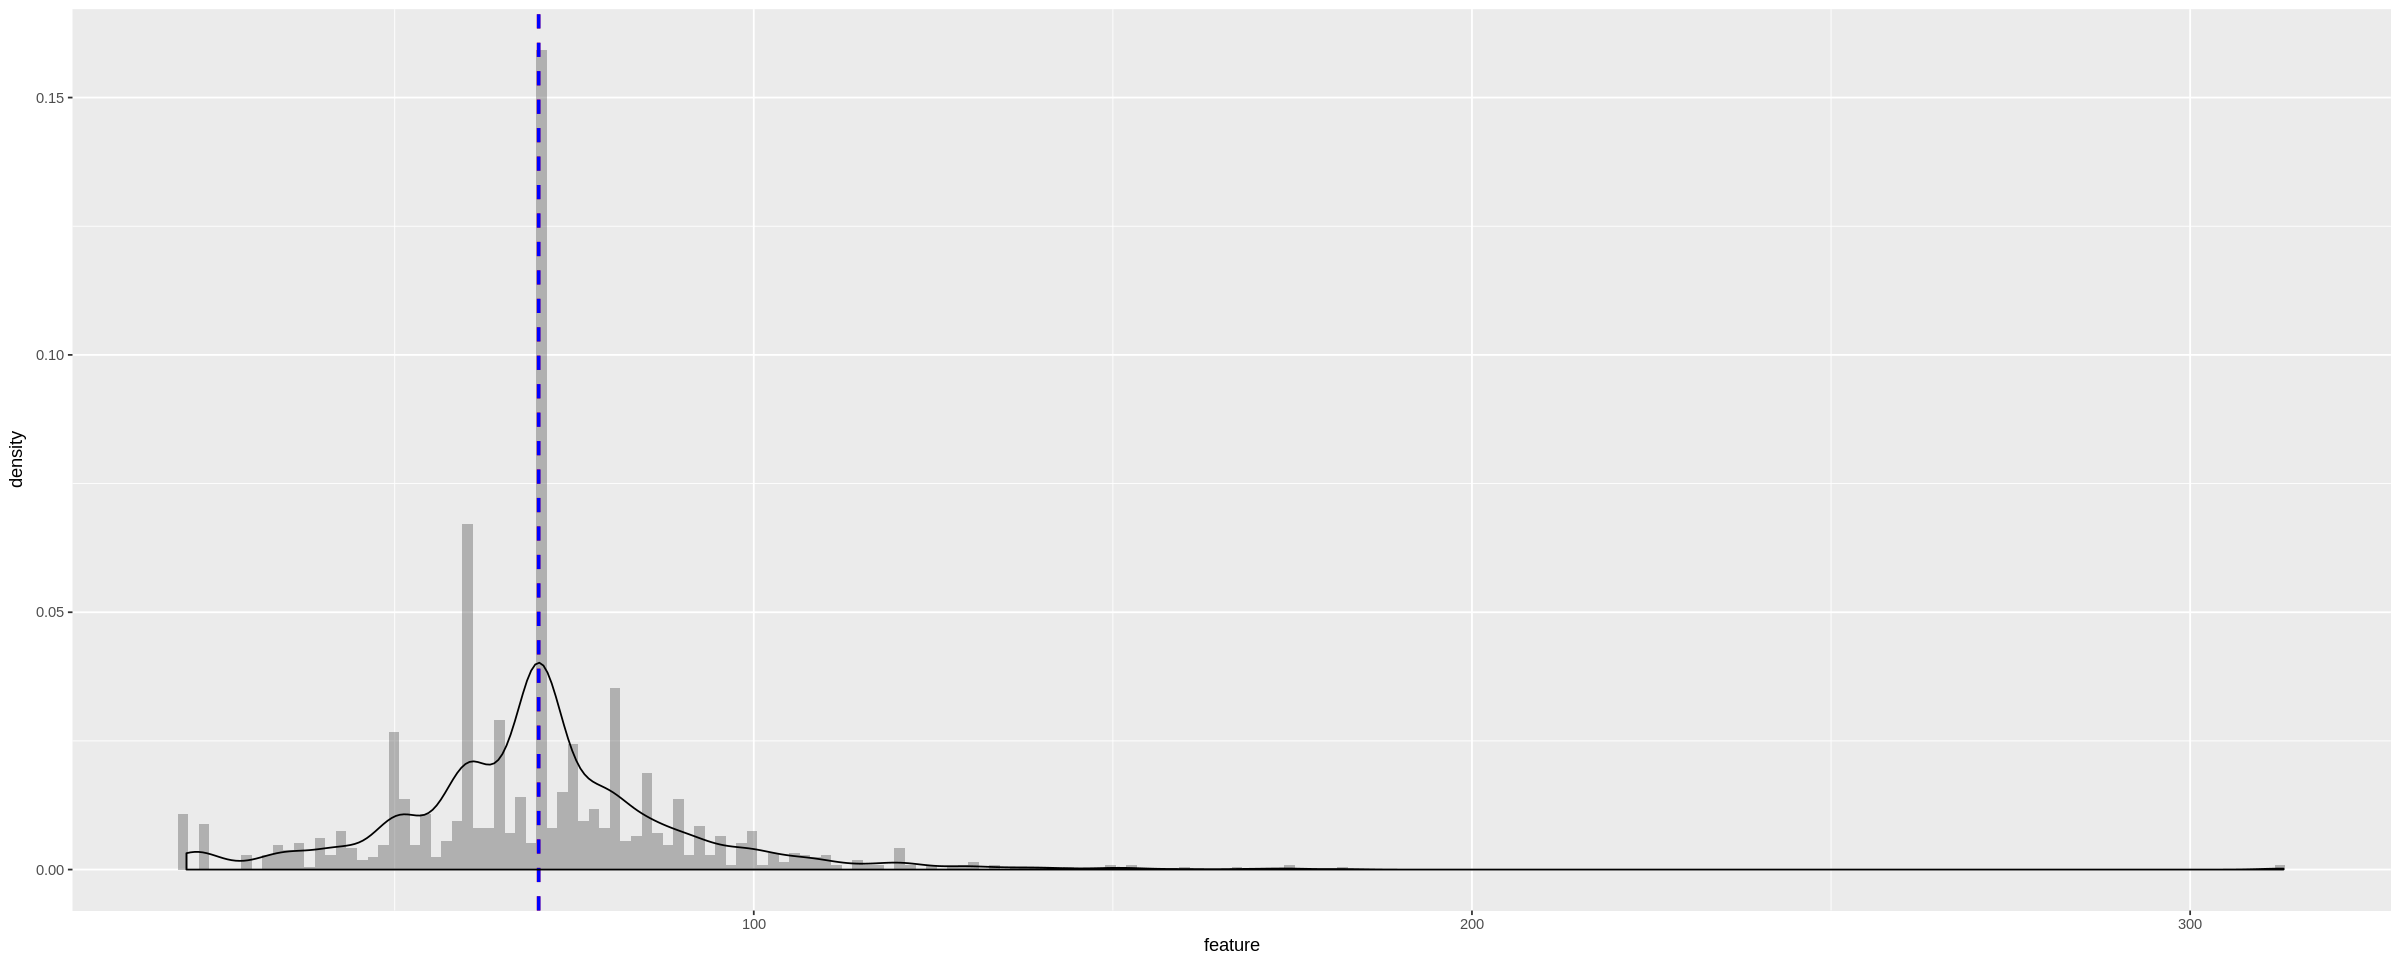

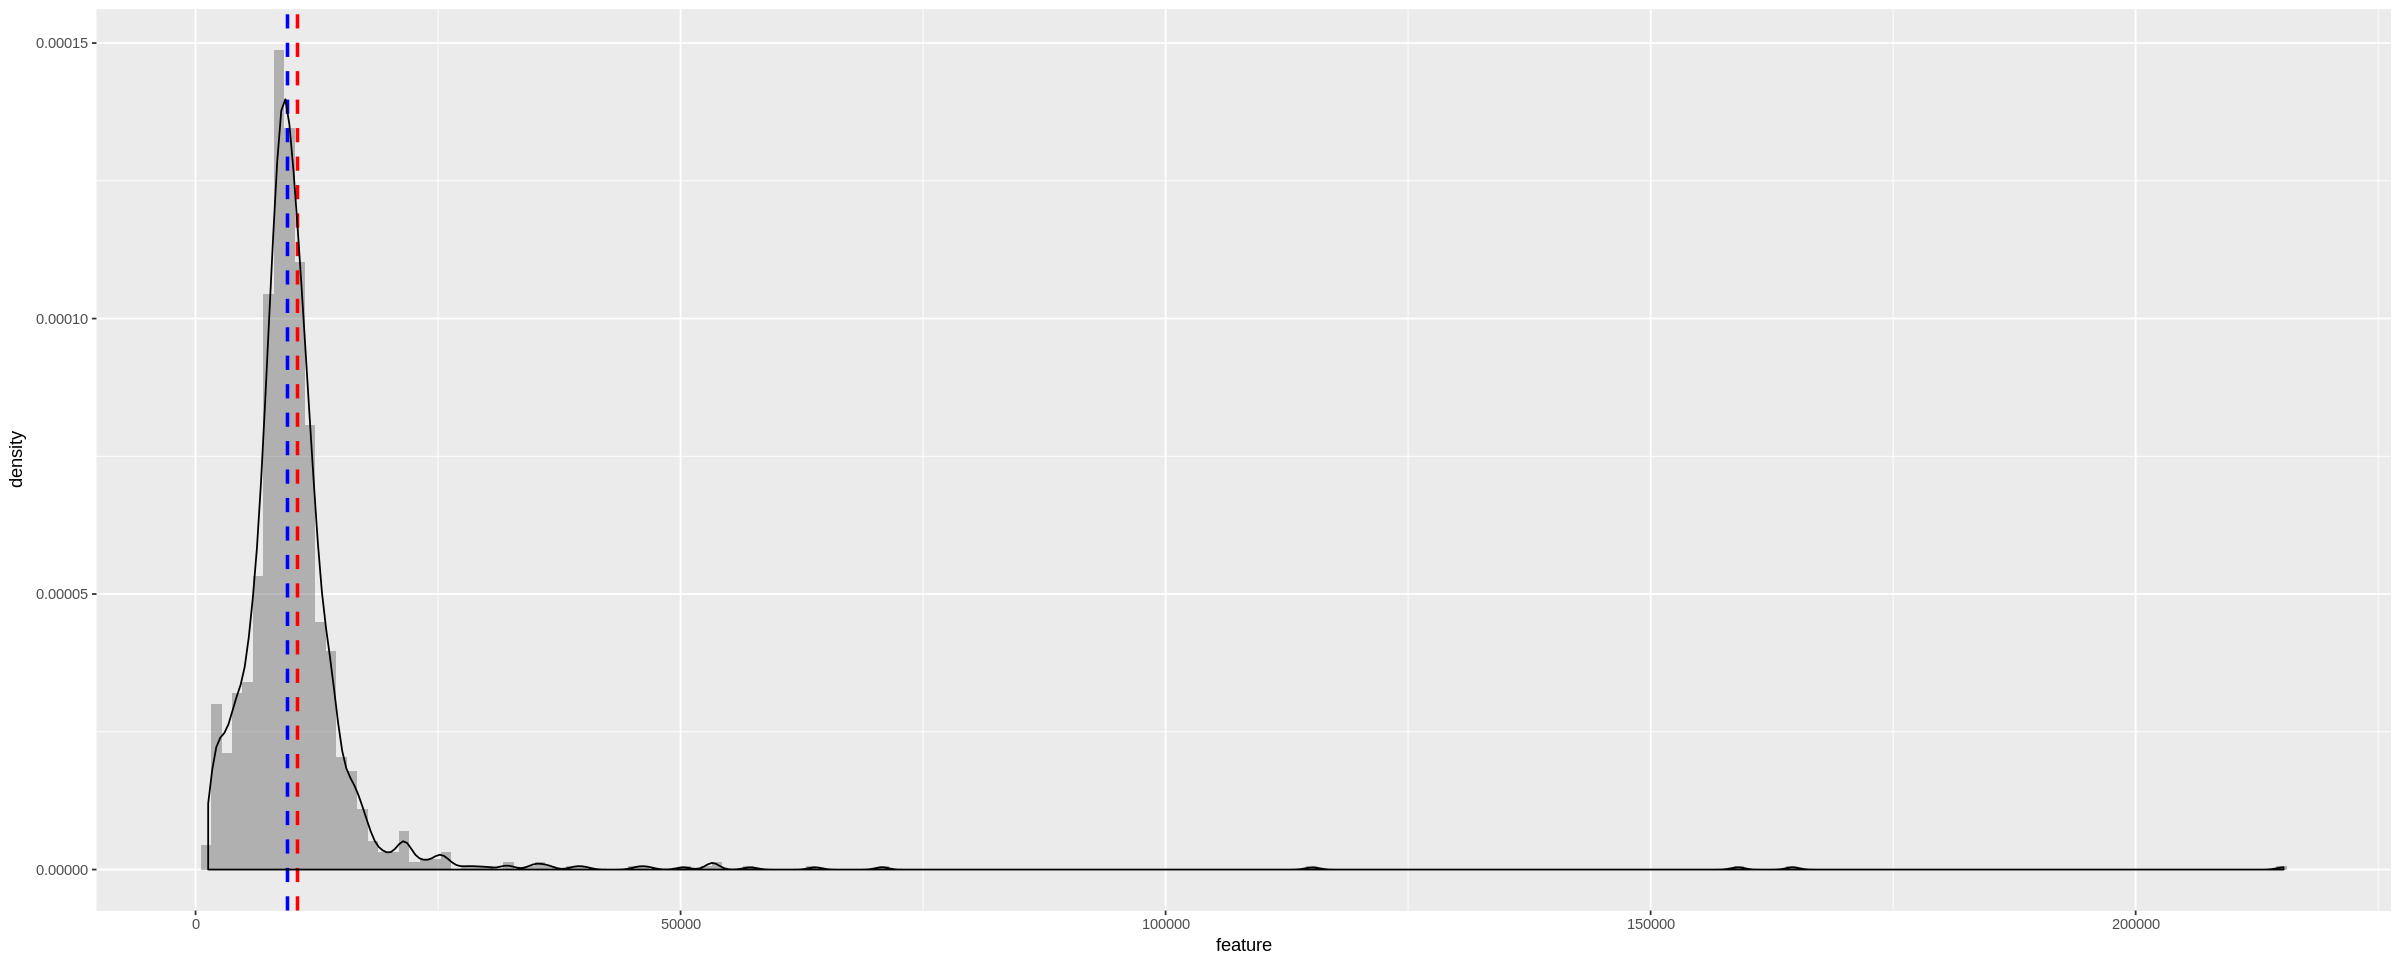

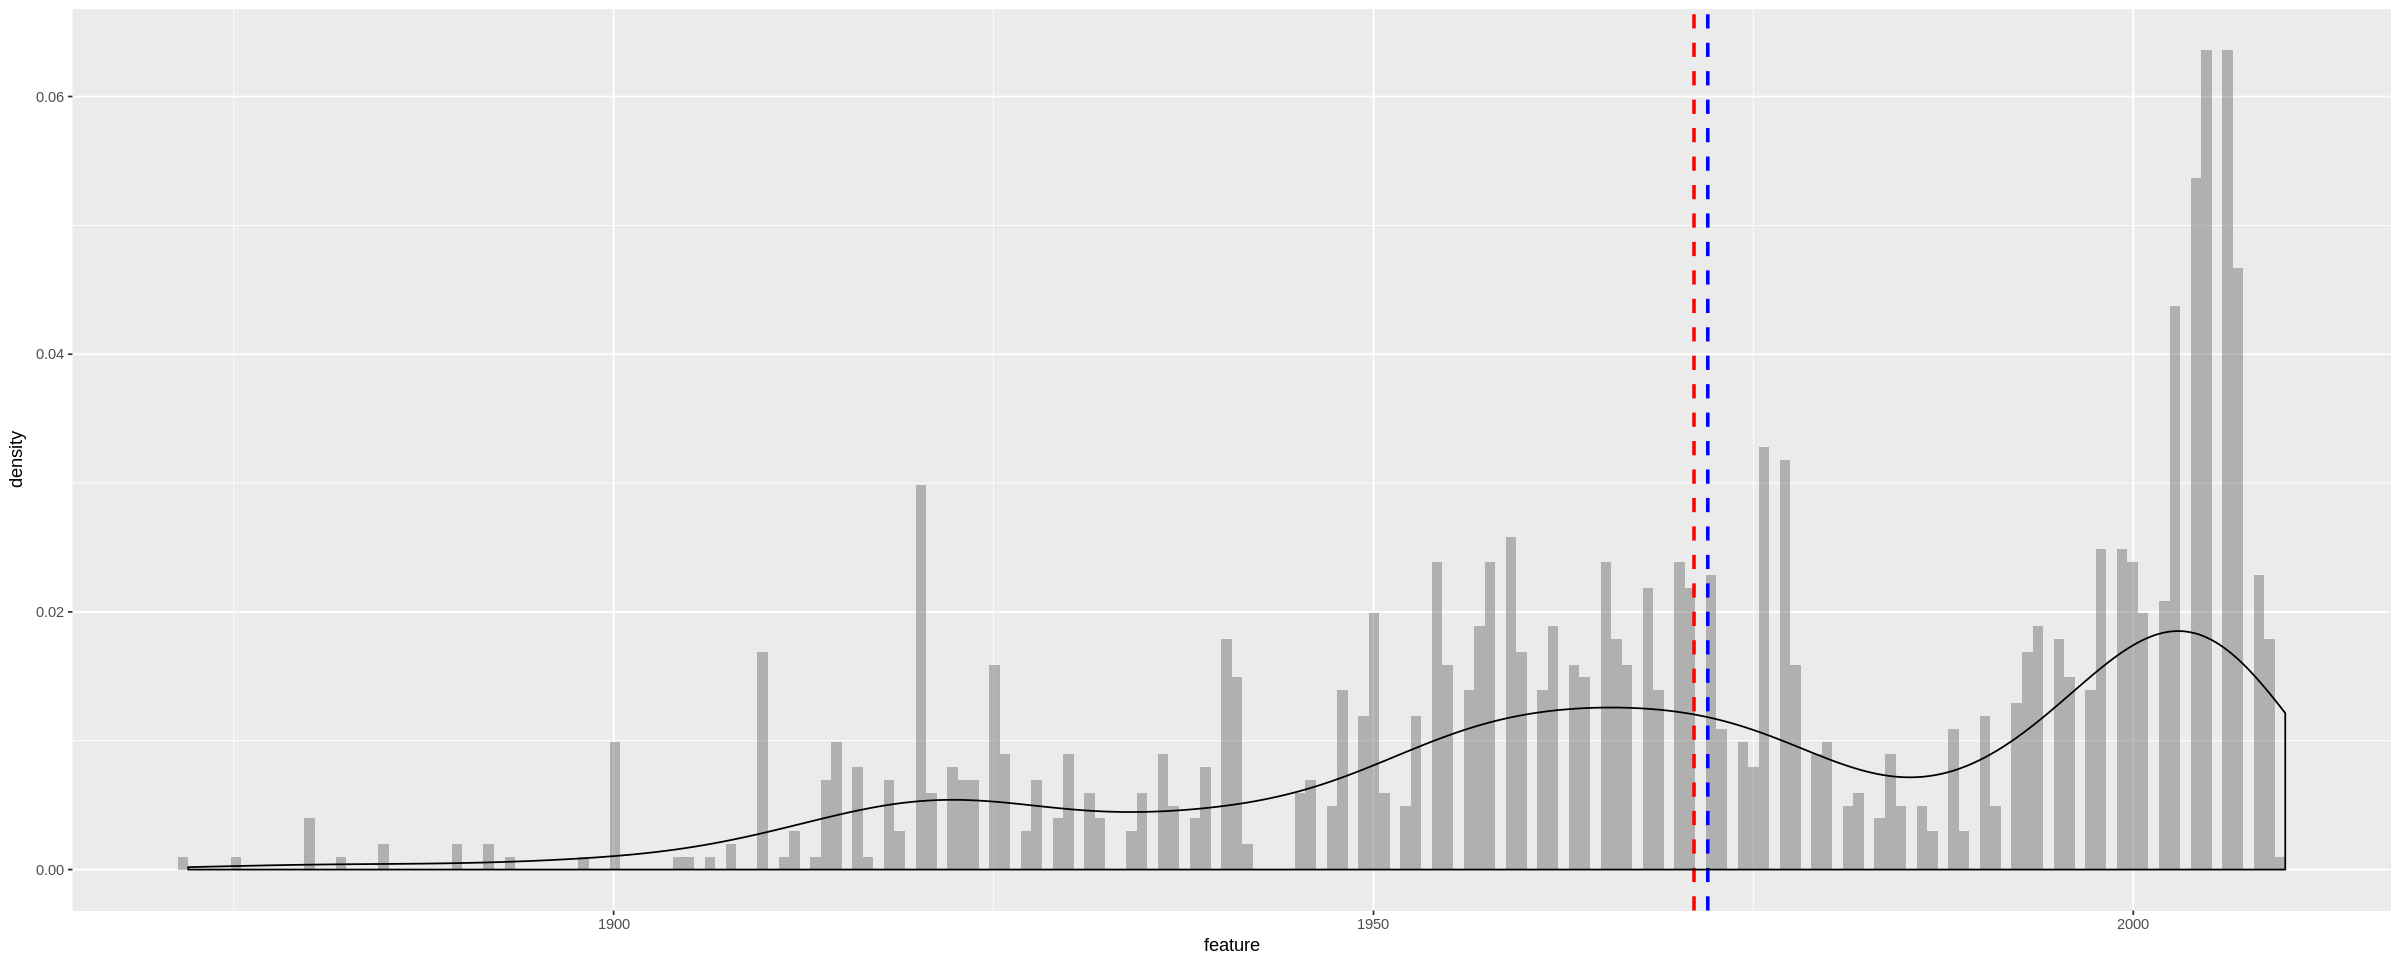

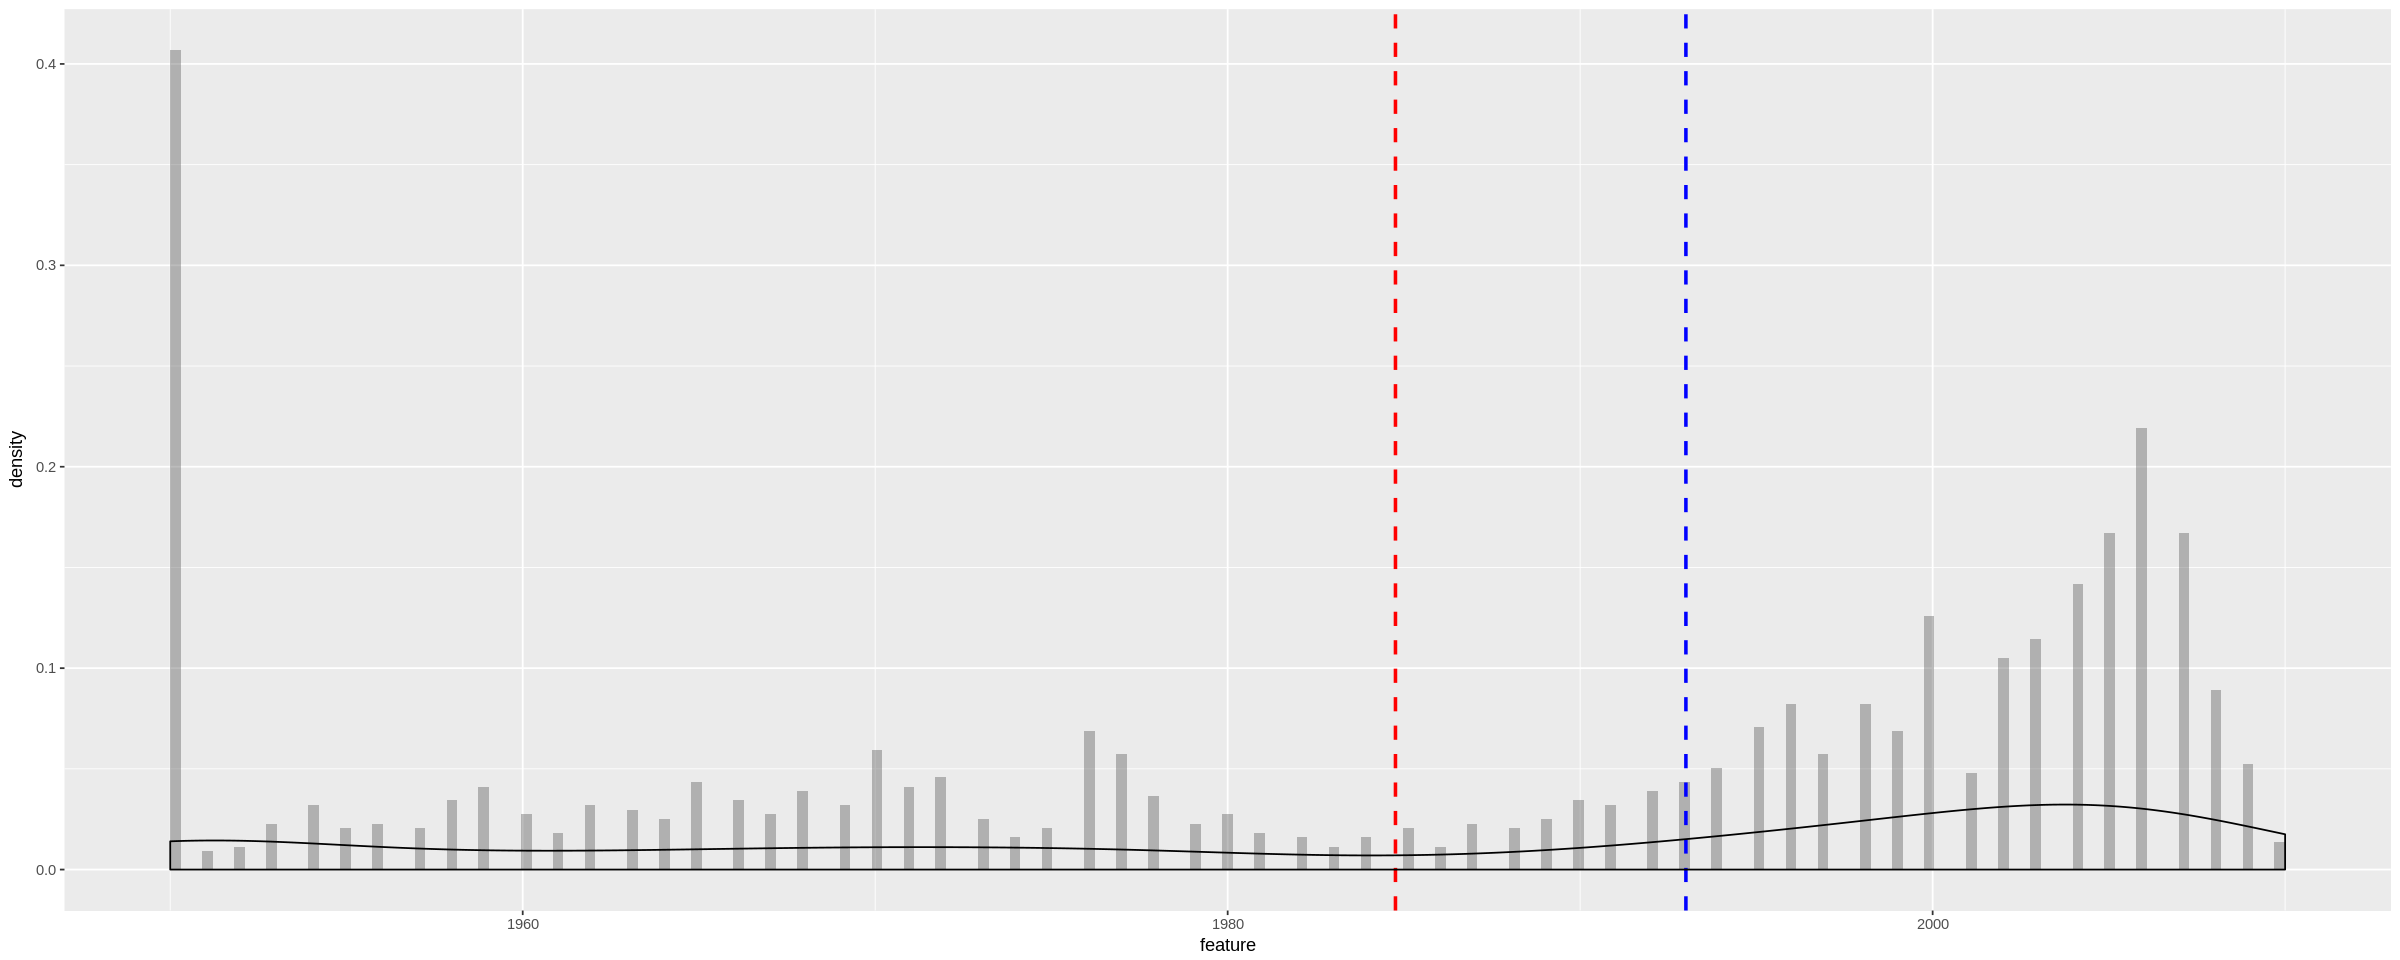

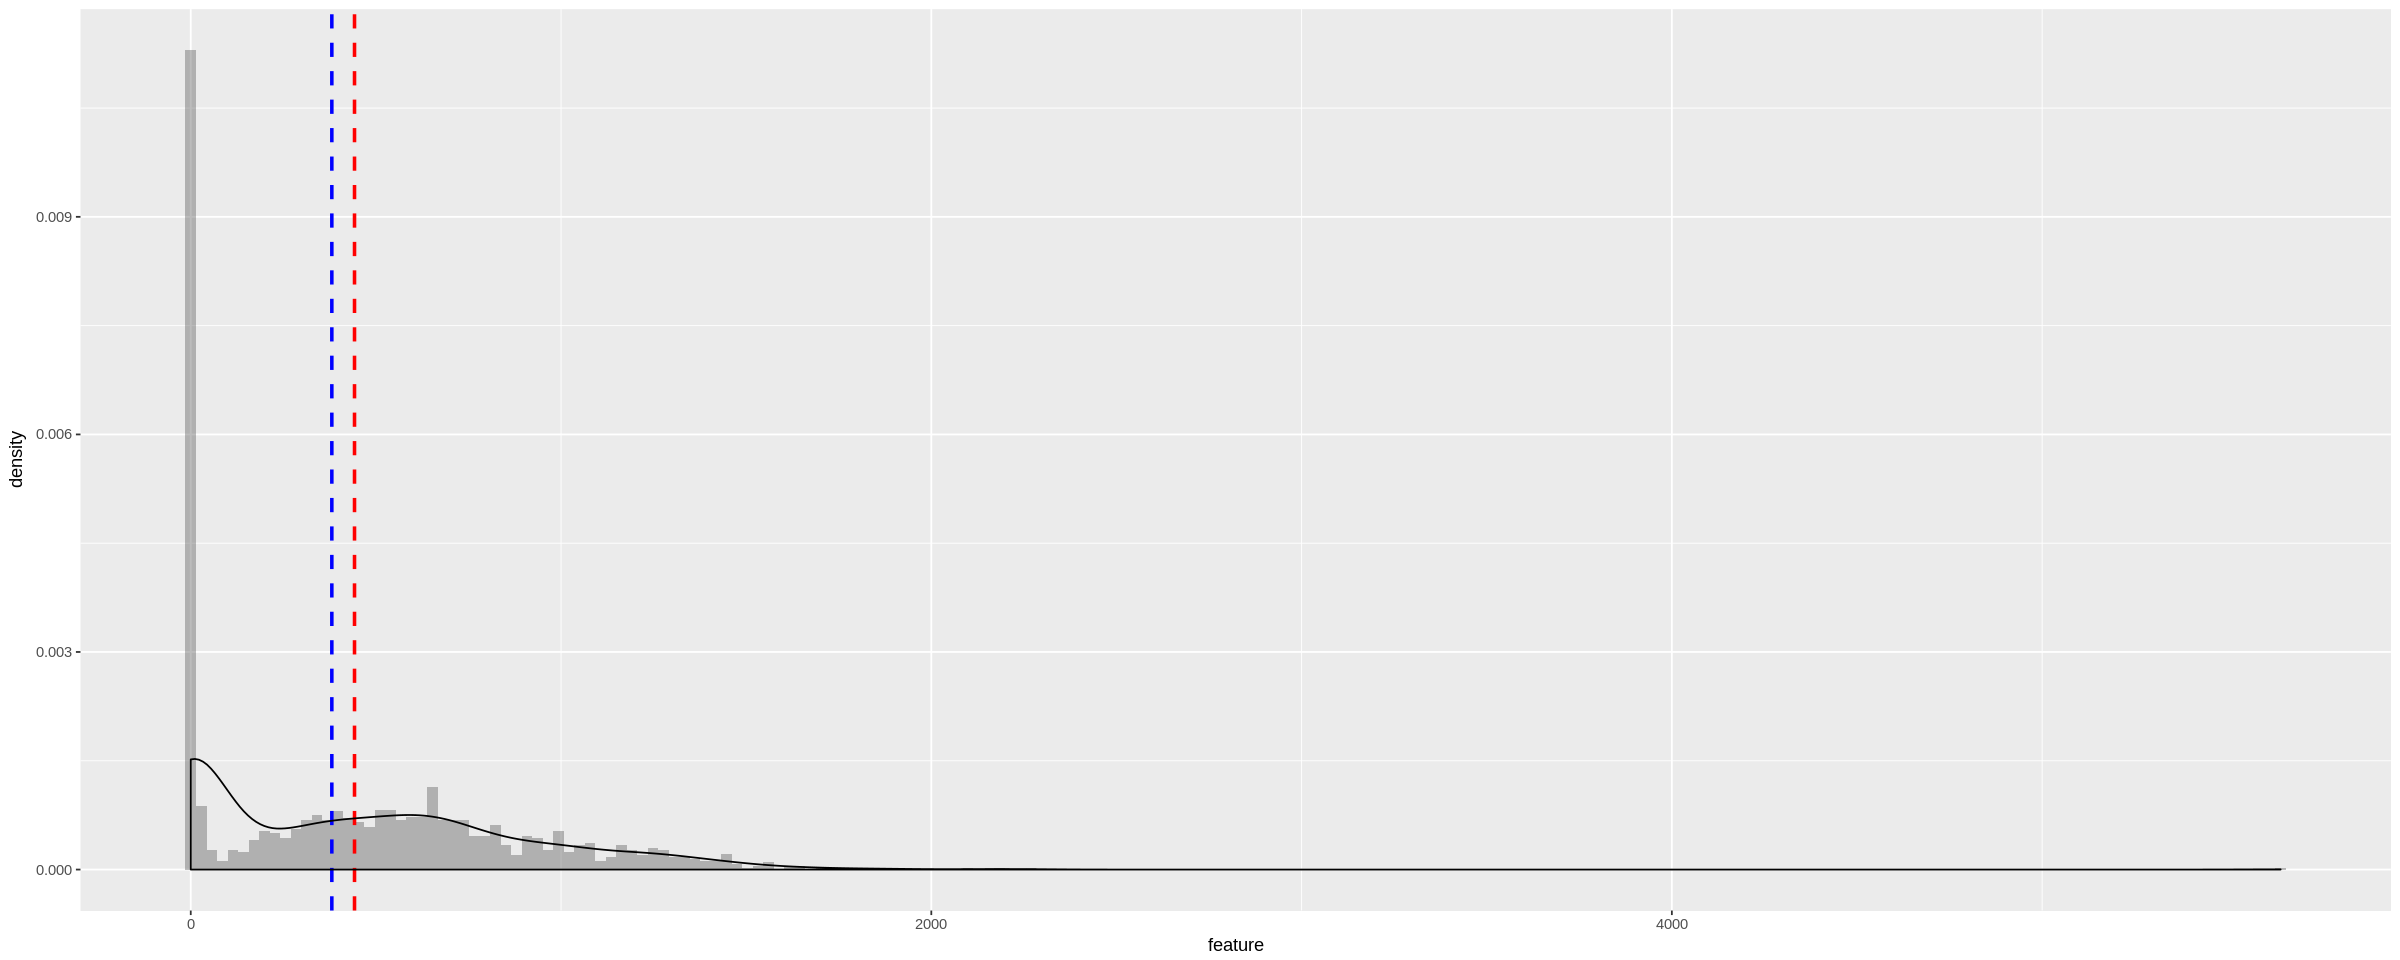

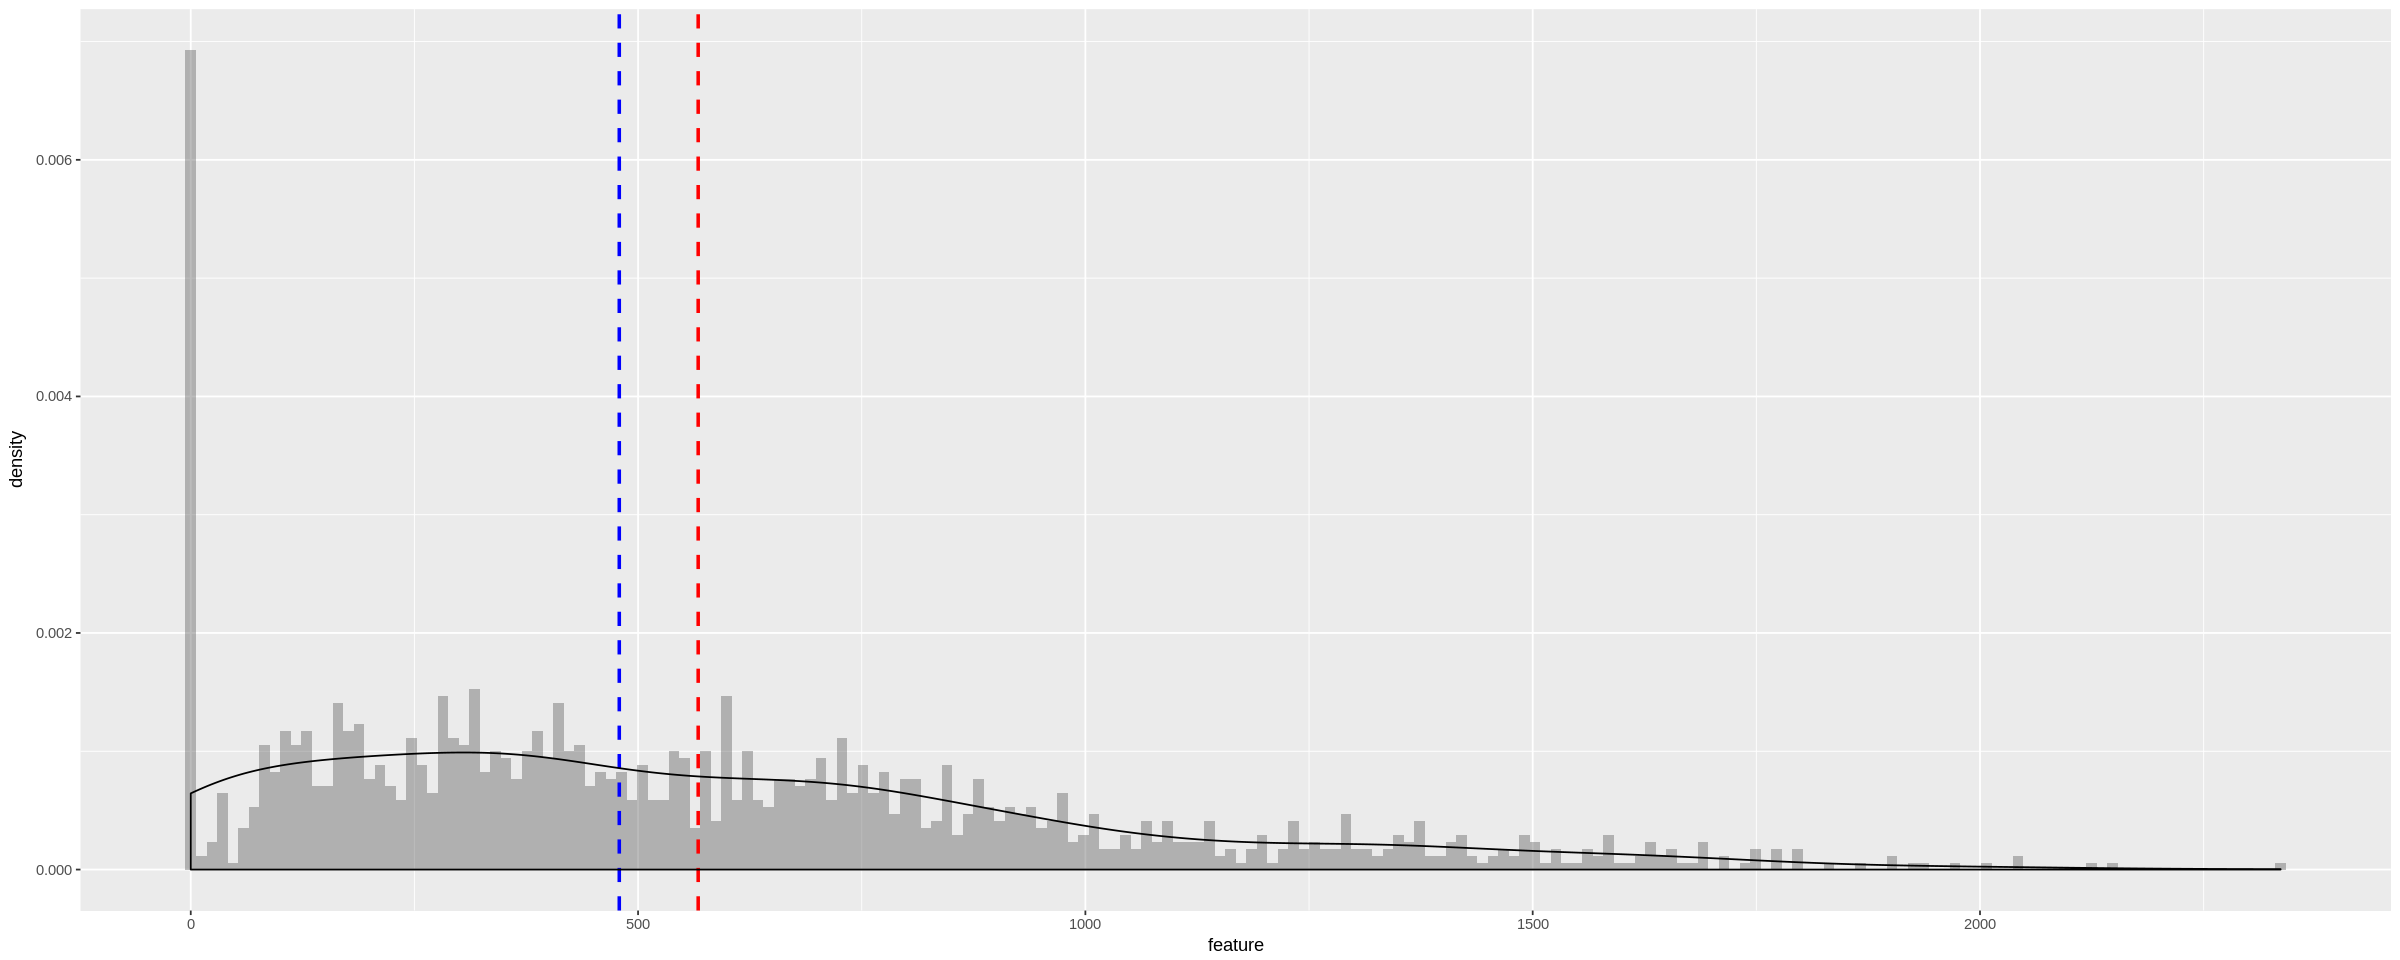

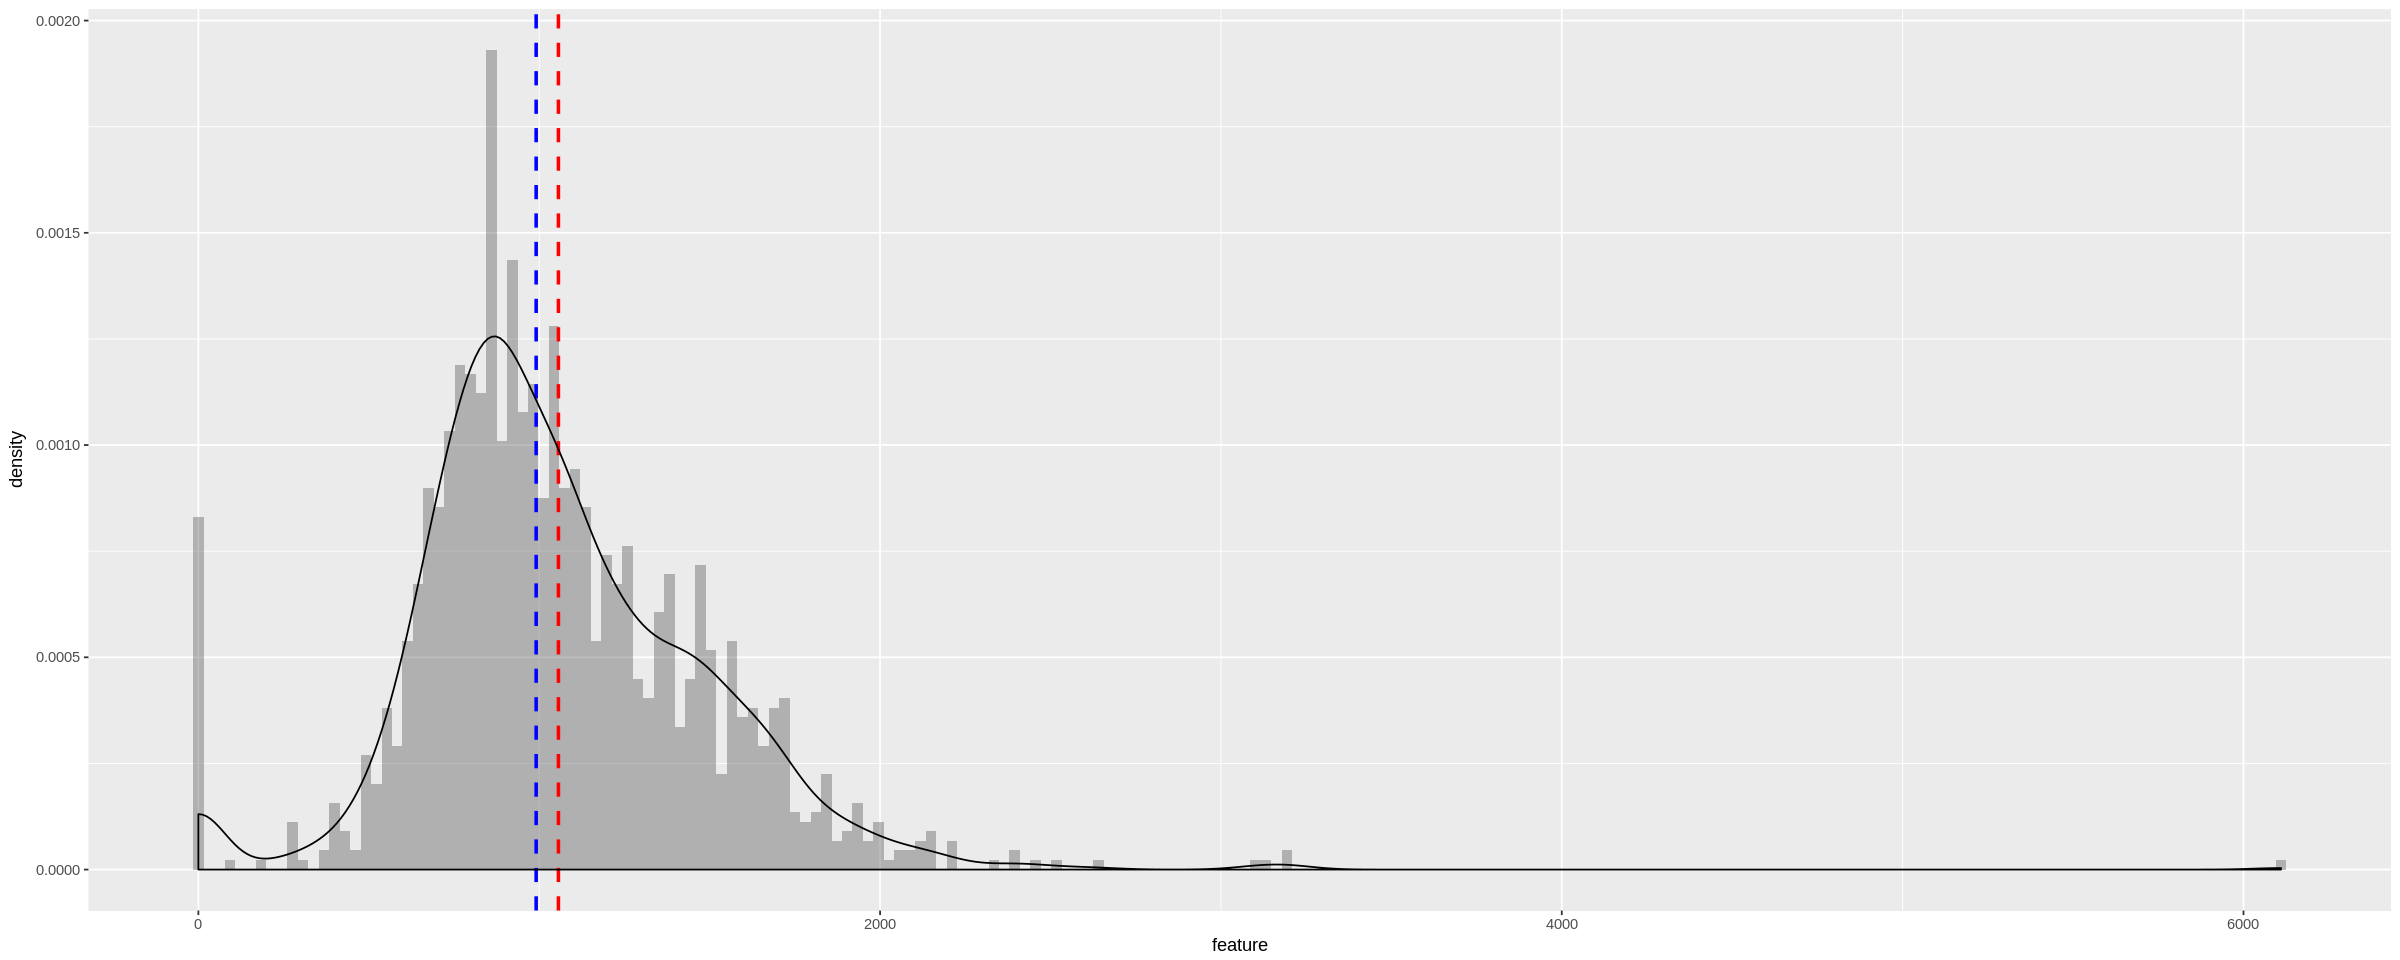

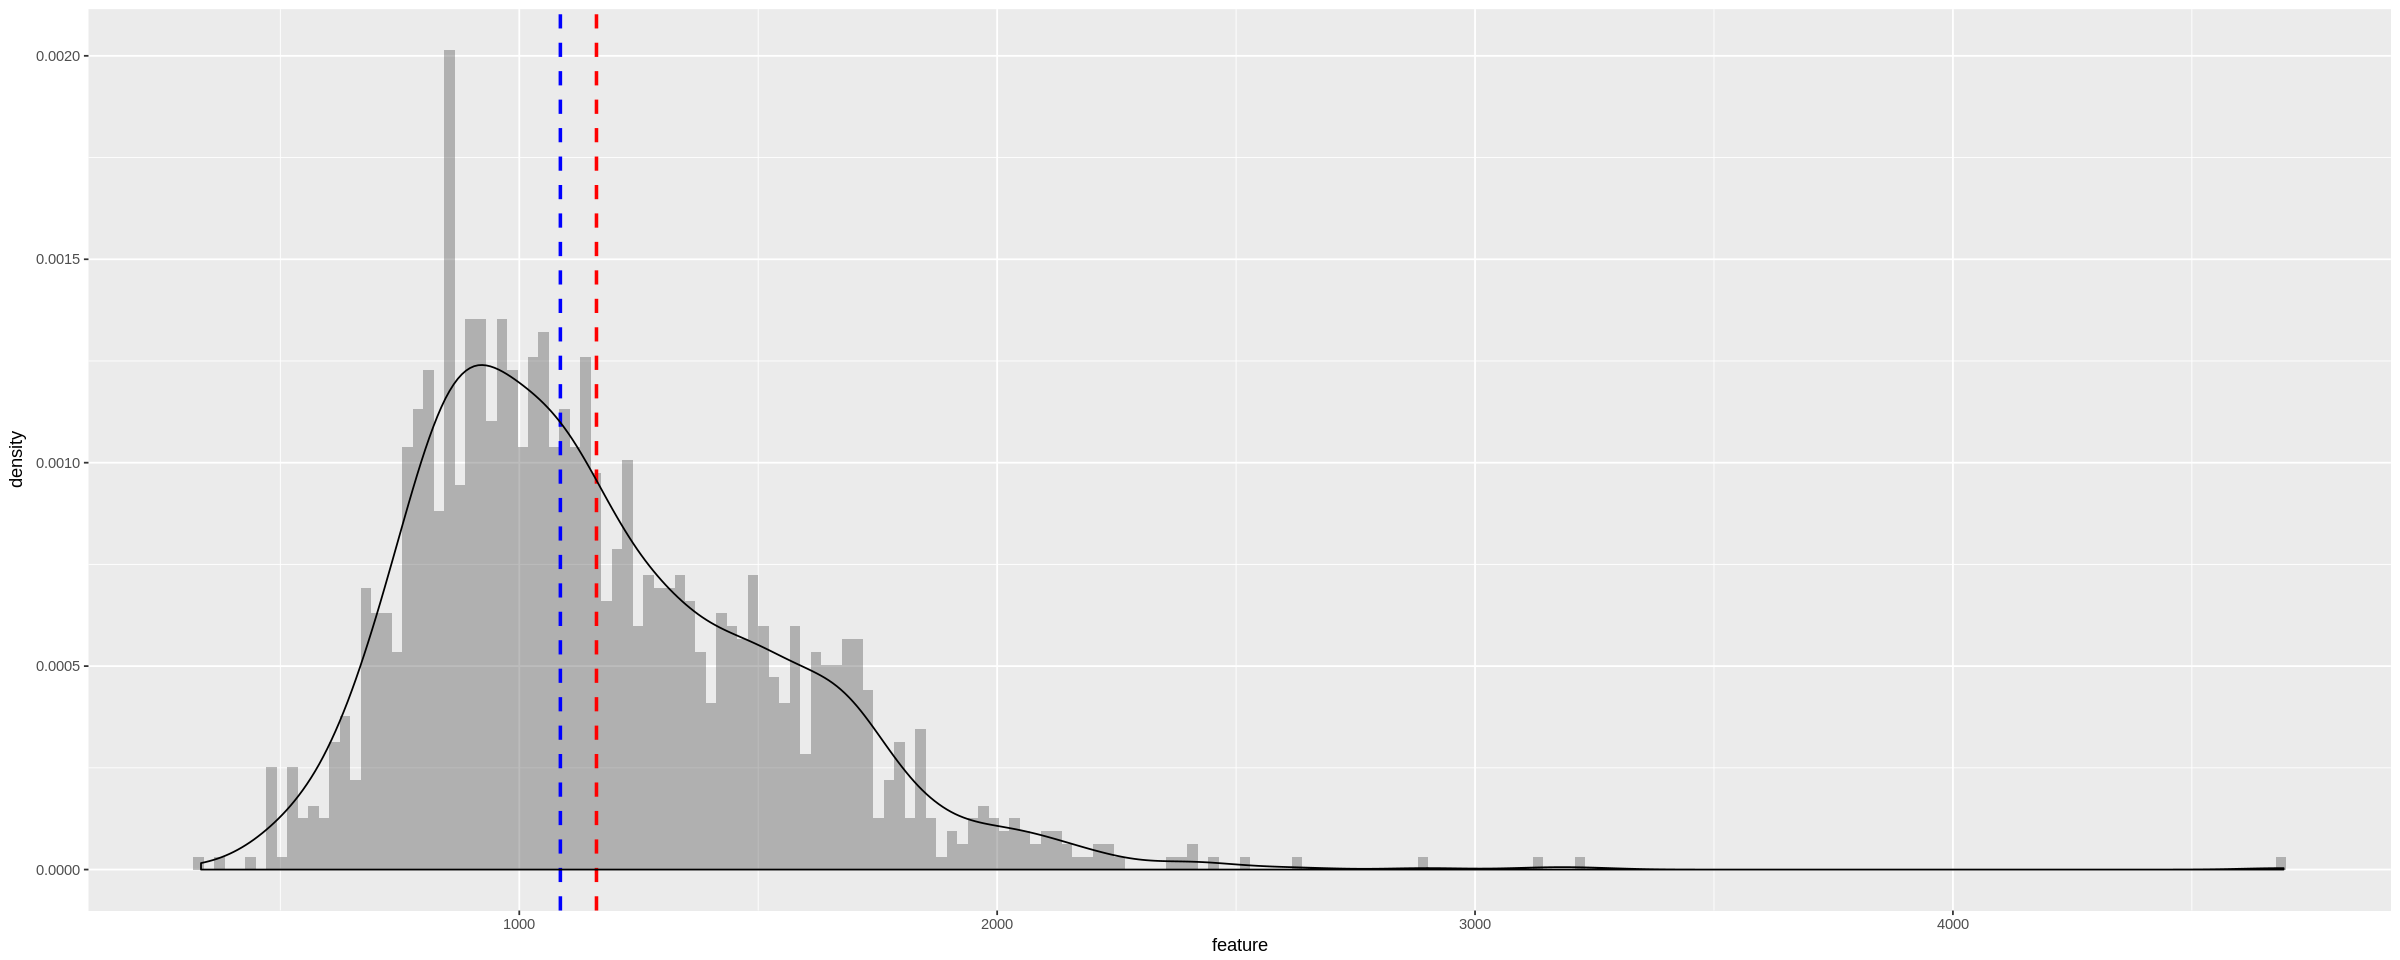

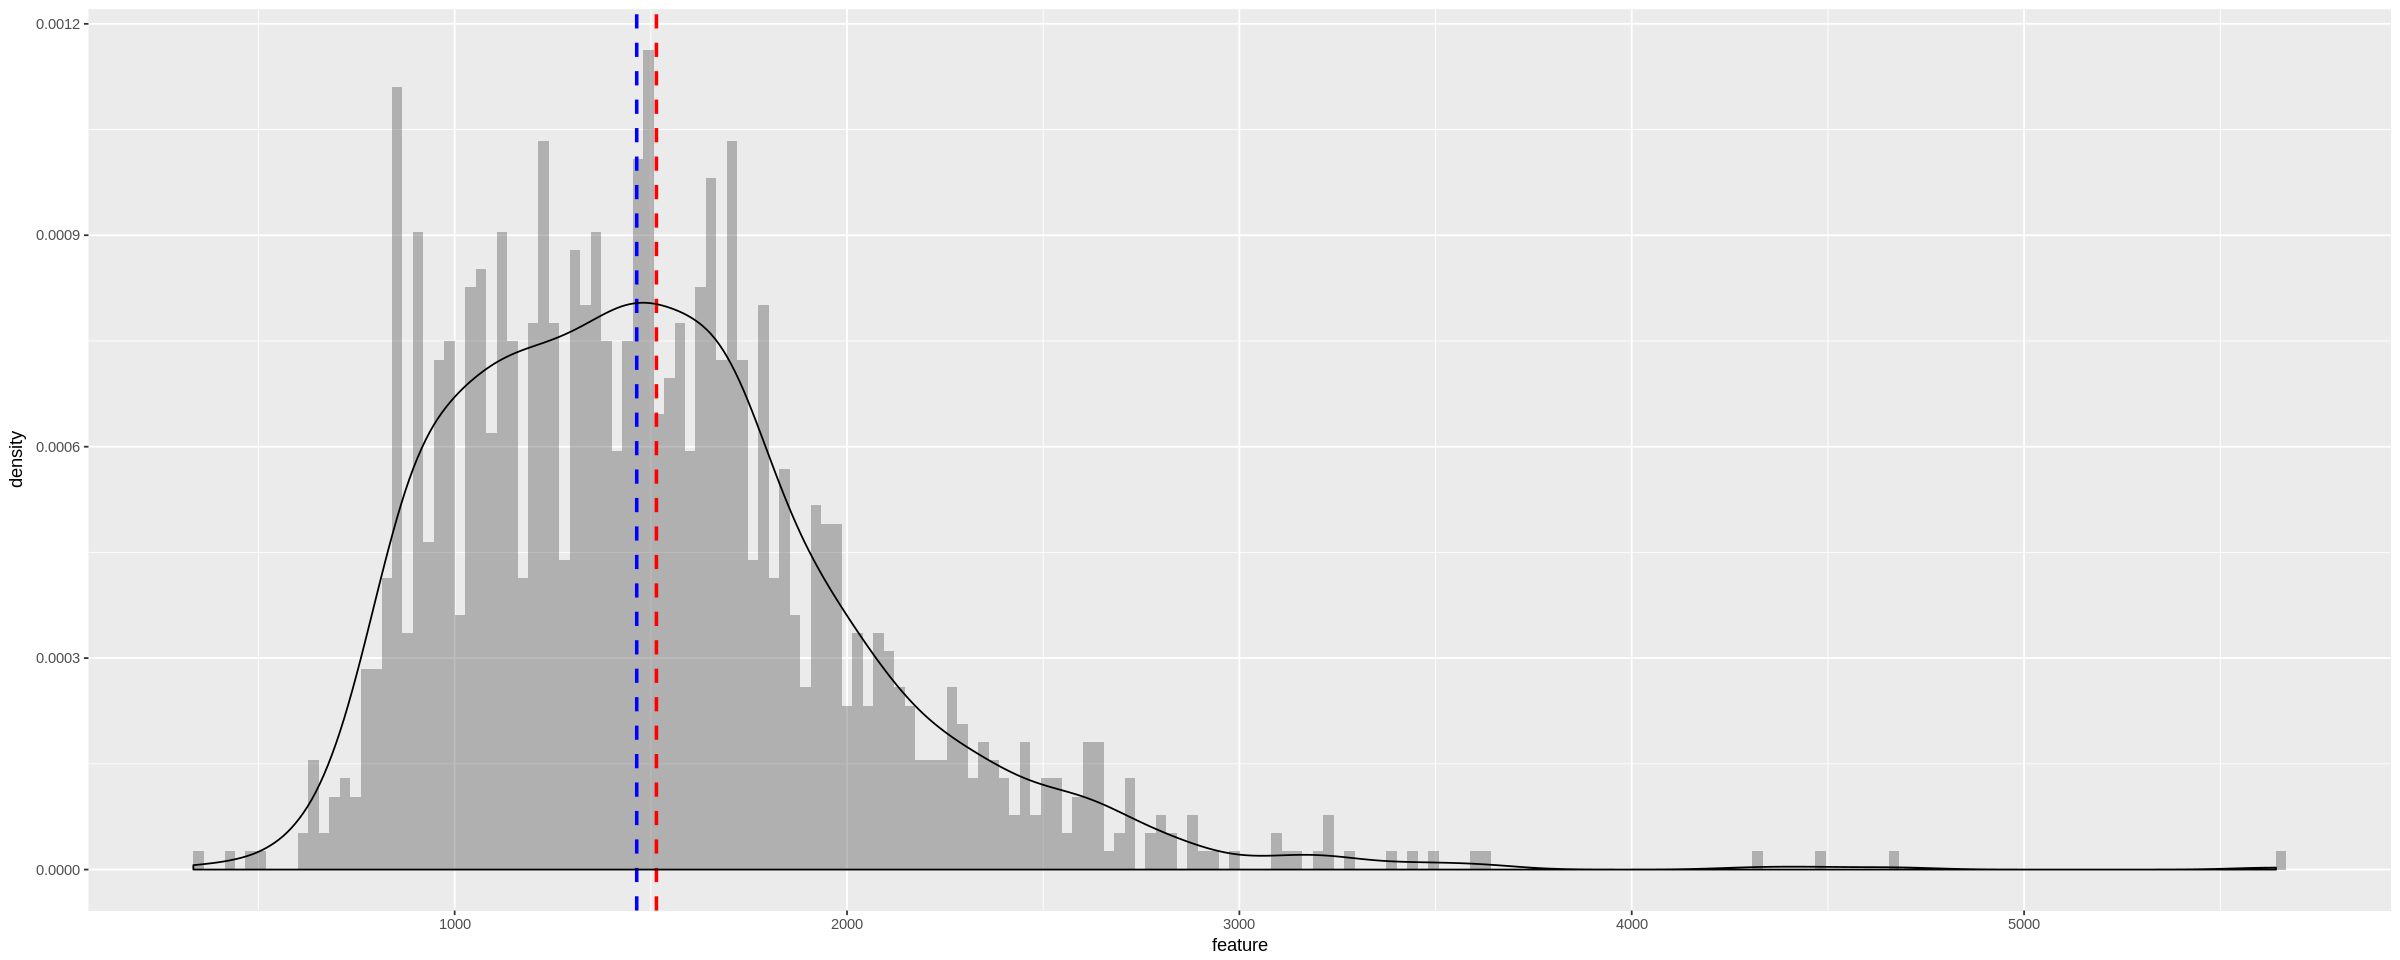

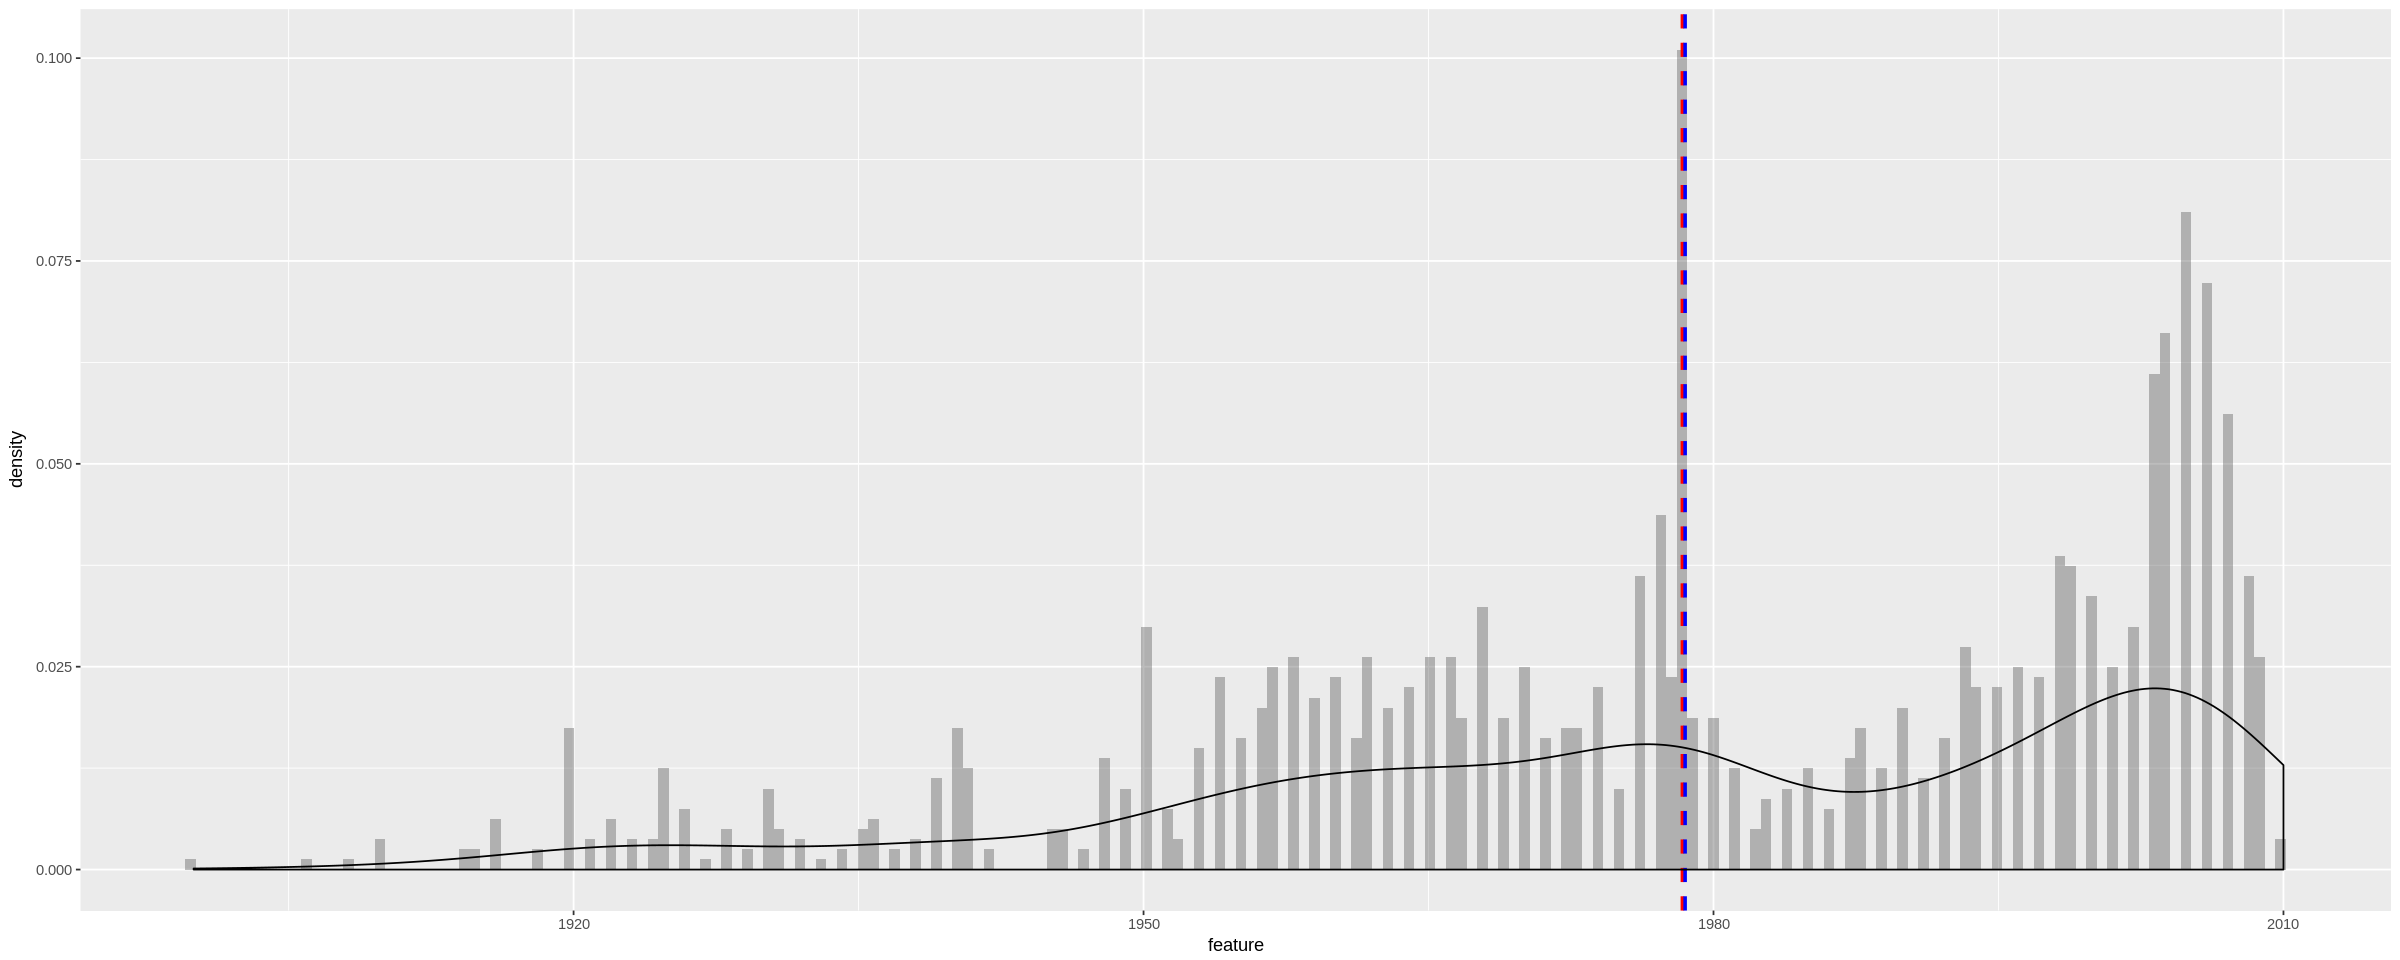

$LotFrontage

$LotArea

$YearBuilt

$YearRemodAdd

$BsmtFinSF1

$BsmtUnfSF

$TotalBsmtSF

$FirstFlrSF

$GrLivArea

$GarageYrBlt

$GarageArea

$YrSold


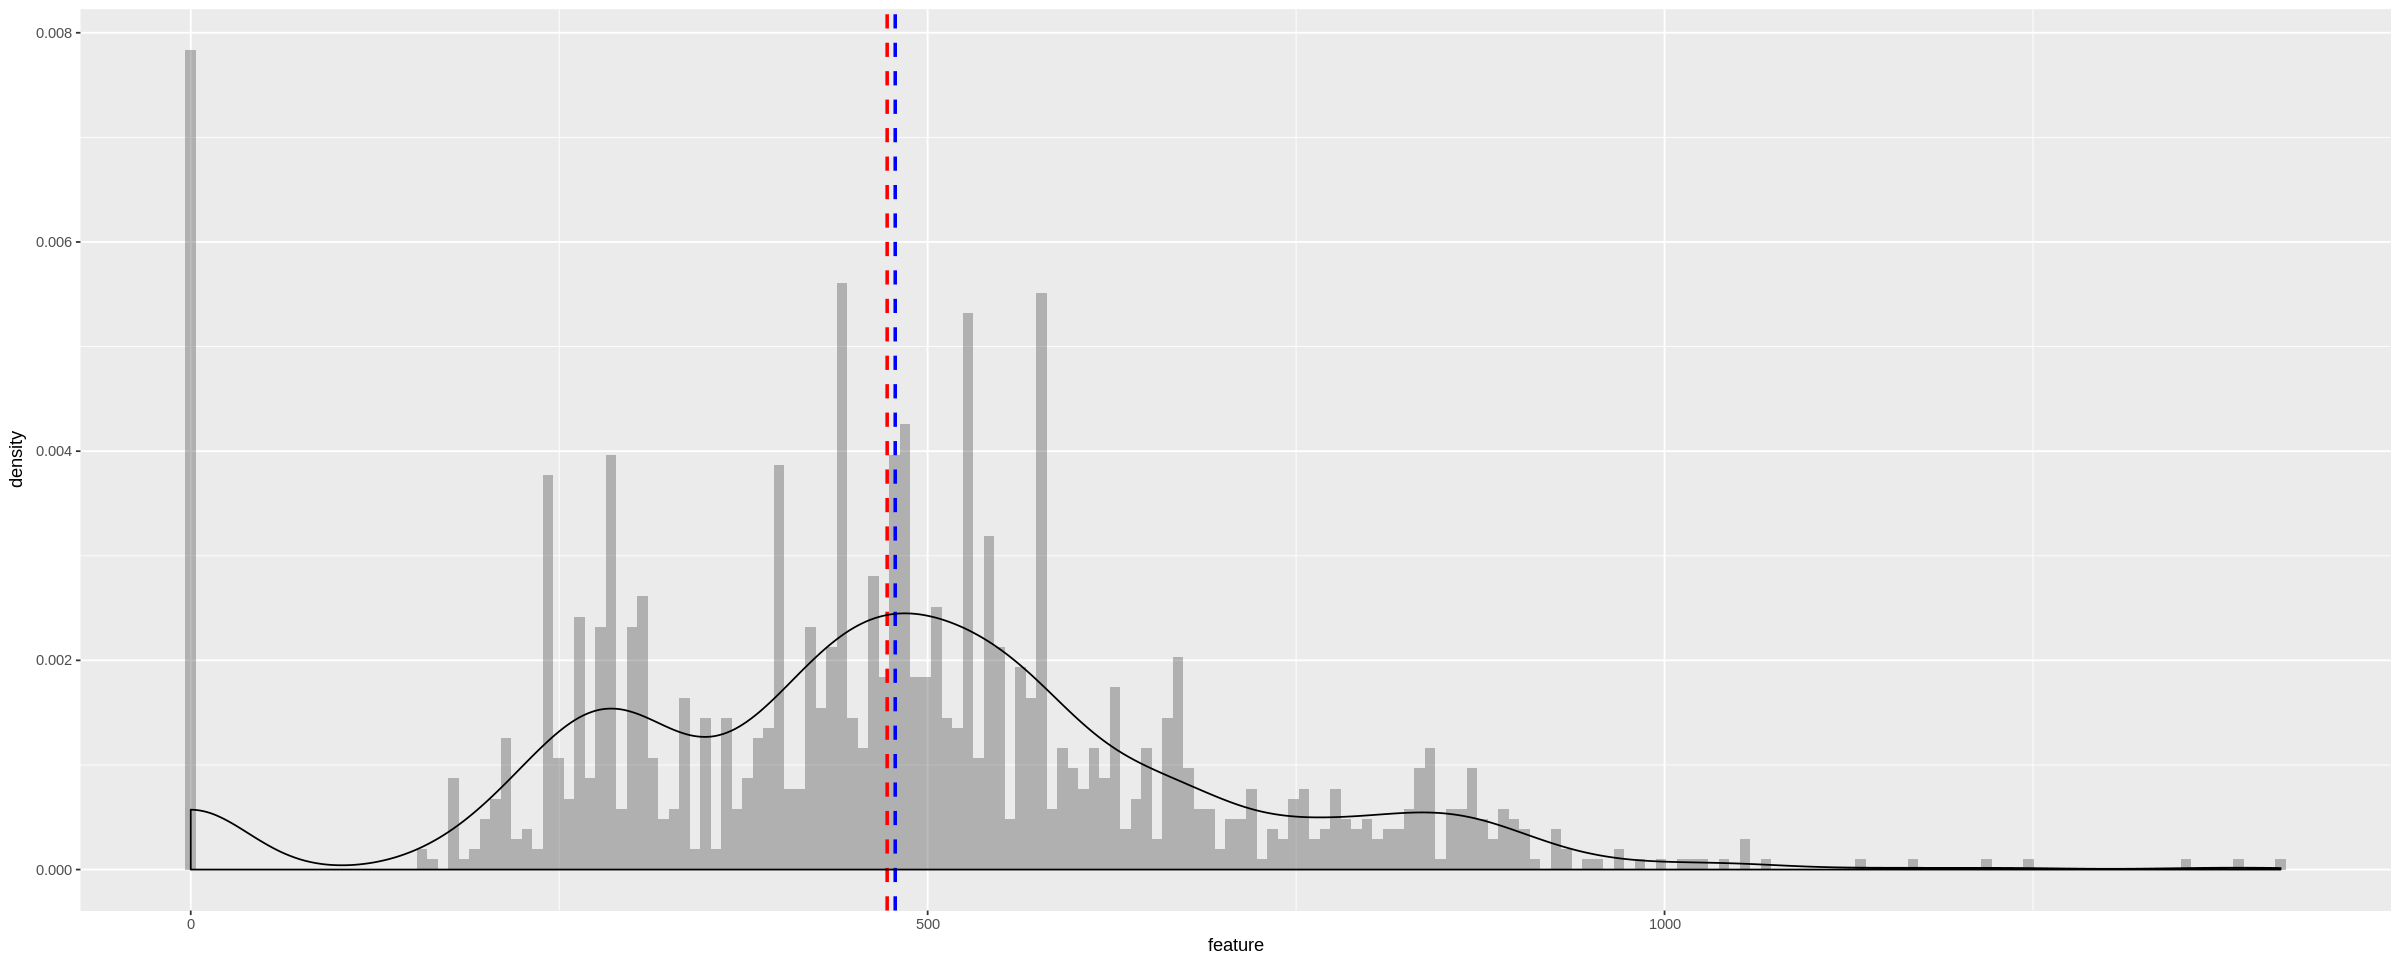

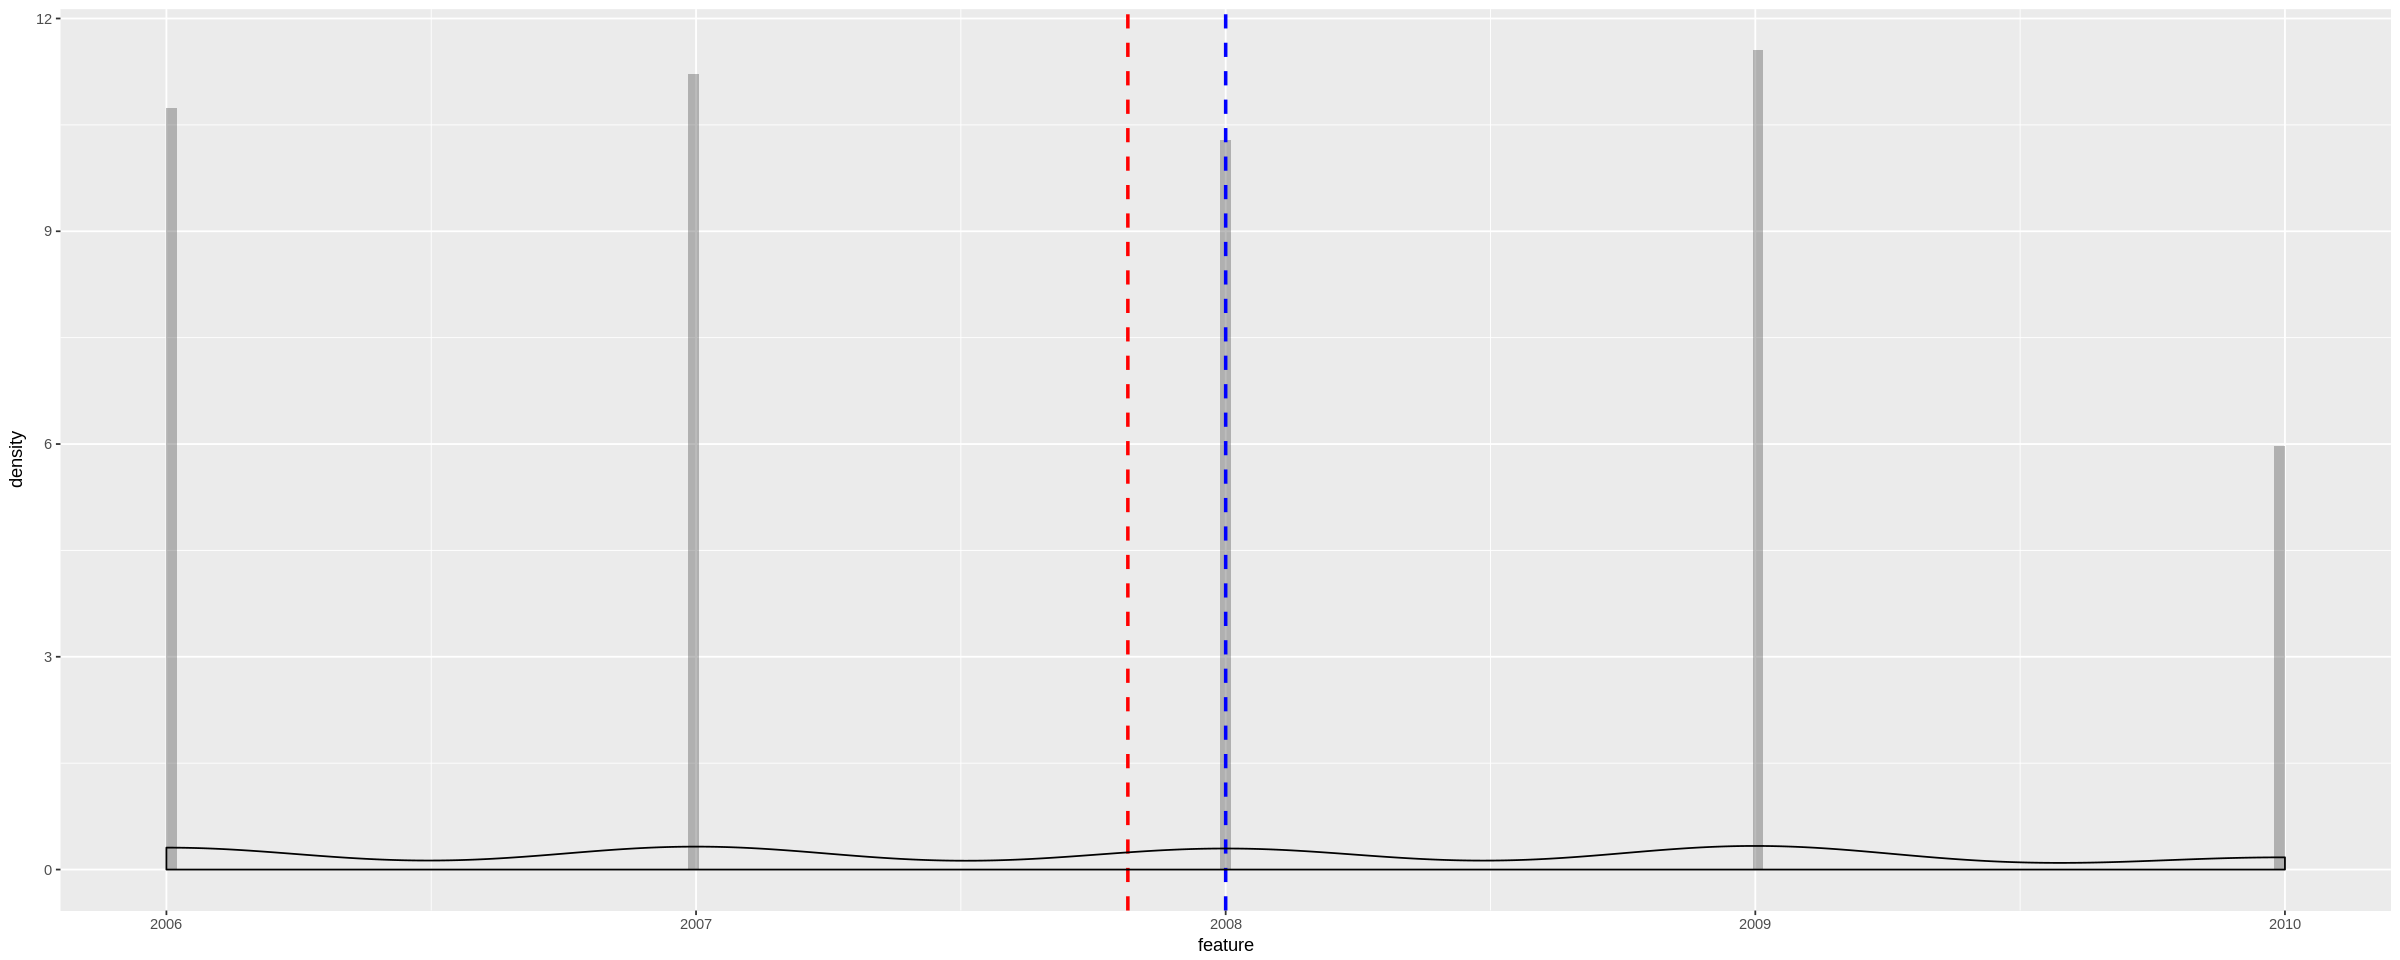

In [13]:
apply(numeric_fewzeros_df, 2, hist_with_kde)

In [14]:
numeric_updated_df <- data.frame(numeric_mostlyzero_df,numeric_somezeros_df,numeric_fewzeros_df)

In [15]:
head(numeric_updated_df)

BsmtFinSF2,LowQualFinSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,MasVnrArea,SecondFlrSF,WoodDeckSF,⋯,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,GrLivArea,GarageYrBlt,GarageArea,YrSold
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,1st_bin,2nd_bin,0,⋯,2003,2003,706,150,856,856,1710,2003,548,2008
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,0,0,2nd_bin,⋯,1976,1976,978,284,1262,1262,1262,1976,460,2007
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,1st_bin,2nd_bin,0,⋯,2001,2002,486,434,920,920,1786,2001,608,2008
FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,0,2nd_bin,0,⋯,1915,1970,216,540,756,961,1717,1998,642,2006
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,1st_bin,2nd_bin,1st_bin,⋯,2000,2000,655,490,1145,1145,2198,2000,836,2008
FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,0,1st_bin,1st_bin,⋯,1993,1995,732,64,796,796,1362,1993,480,2009


In [16]:
write.csv(numeric_updated_df, 'numeric_updated_df')